In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [14]:
with open("test_dp.txt", "r") as file:
    data = json.load(file)

df = pd.DataFrame(data)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49978 entries, 0 to 49977
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            49978 non-null  int64  
 1   punishmentType                49978 non-null  object 
 2   entityType                    49978 non-null  object 
 3   indLastNameOnOffenseMoment    49974 non-null  object 
 4   indFirstNameOnOffenseMoment   49974 non-null  object 
 5   indPatronymicOnOffenseMoment  49869 non-null  object 
 6   offenseId                     41505 non-null  float64
 7   offenseName                   49974 non-null  object 
 8   punishment                    45991 non-null  object 
 9   courtCaseNumber               46124 non-null  object 
 10  sentenceDate                  47506 non-null  object 
 11  sentenceNumber                42792 non-null  object 
 12  punishmentStart               47080 non-null  object 
 13  c

In [16]:
df.describe()

,id,offenseId,courtId
count,49978.000000,41505.000000,47504.000000
mean,138816.287807,82377.901650,11121.930195
std,124256.102309,35021.966081,16530.282073
min,4.000000,73942.000000,1.000000
25%,39646.750000,73942.000000,1491.000000
50%,82558.500000,74002.000000,3811.000000
75%,283514.750000,76569.000000,13446.000000
max,386368.000000,343572.000000,343568.000000


In [17]:
df.isnull().sum()

id                                  0
punishmentType                      0
entityType                          0
indLastNameOnOffenseMoment          4
indFirstNameOnOffenseMoment         4
indPatronymicOnOffenseMoment      109
offenseId                        8473
offenseName                         4
punishment                       3987
courtCaseNumber                  3854
sentenceDate                     2472
sentenceNumber                   7186
punishmentStart                  2898
courtId                          2474
courtName                        2474
codexArticles                    2535
decreeDate                      47507
decreeNumber                    47506
dtype: int64

In [18]:
# Converting date from object to date format and extracting information from cells with JSON/dict
df['sentenceDate'] = pd.to_datetime(df['sentenceDate'], errors ="coerce") 
df['punishmentStart'] = pd.to_datetime(df['punishmentStart'], errors ="coerce") 

df['punishmentType'] = df['punishmentType'].apply(lambda x: x['name'])
df['entityType'] = df['entityType'].apply(lambda x: x['name'])
df["codexArticles"] = df["codexArticles"].apply(
    lambda x: x[0].get("codexArticleName", None) if isinstance(x, list) and isinstance(x[0], dict) else None)

In [19]:
# After checking for gaps, I noticed that there were columns that had 90+% gaps, 
# it was decided to add them since they were not of great importance, replaced "-" symbols to NaN
df.drop(labels=["id", "decreeNumber", "decreeDate"], axis=1, inplace=True)
df.replace("-", "NaN", inplace=True)

In [20]:
df['year'] = df['punishmentStart'].dt.year
grouped = df.groupby(['year', 'punishmentType']).size().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

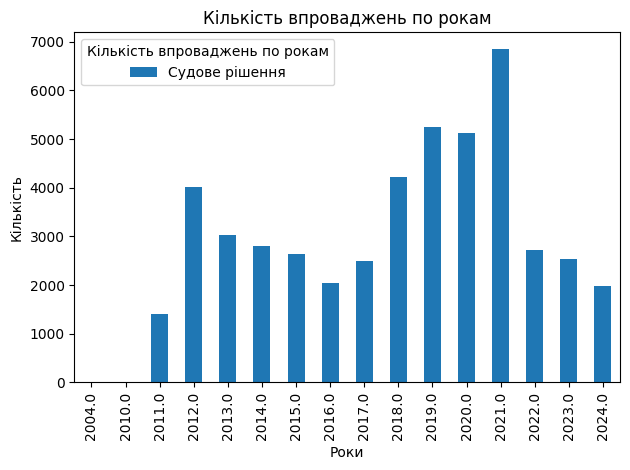

In [21]:
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', stacked=True)
plt.title('Кількість впроваджень по рокам')
plt.xlabel('Роки')
plt.ylabel('Кількість')
plt.legend(title='Кількість впроваджень по рокам')
plt.tight_layout()
plt.show()

In [ ]:
# save output db file in csv
# df.to_csv("db.csv", index=False, encoding="utf-8-sig")

In [ ]:
# 123